In [1]:
# Librerie per manipolazione dati
import pandas as pd           # Analisi e manipolazione dati strutturati
import numpy as np           # Calcoli numerici e operazioni matematiche

# Librerie per visualizzazione
import matplotlib.pyplot as plt  # Creazione di grafici base
import seaborn as sns           # Visualizzazioni statistiche avanzate

# Librerie per Machine Learning
from sklearn.model_selection import train_test_split  # Divisione dataset train/test
from sklearn.compose import ColumnTransformer         # Preprocessing colonne diverse
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # Encoding e scaling
from sklearn.pipeline import Pipeline                 # Creazione pipeline ML
from sklearn.linear_model import LinearRegression     # Modello di regressione lineare
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  # Metriche

In [2]:
df = pd.read_csv(r"C:\Users\poppo\Desktop\riverloop project\DataAnalyst-course\Studenti\JordyDiGiulio\giorno12\dataset_regressione.csv")
print(f"📏 Dimensioni del dataset: {df.shape[0]} righe × {df.shape[1]} colonne")
df.info()
display(df.describe())
valori_mancanti = df.isnull().sum()
print("Valori mancanti per colonna:")
for colonna, numero in valori_mancanti.items():
    if numero > 0:
        print(f"  ❌ {colonna}: {numero} valori mancanti")
    else:
        print(f"  ✅ {colonna}: nessun valore mancante")
        
if valori_mancanti.sum() == 0:
    print("\n🎉 Ottimo! Il dataset non ha valori mancanti.")
else:
    print(f"\n⚠️  Attenzione: {valori_mancanti.sum()} valori mancanti totali da gestire.")


📏 Dimensioni del dataset: 100 righe × 2 colonne
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OreStudio  100 non-null    float64
 1   VotoEsame  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


,OreStudio,VotoEsame
count,100.000000,100.00000
mean,4.701900,16.75160
std,2.974779,7.53035
min,0.060000,3.37000
25%,1.932500,10.21750
50%,4.640000,15.47000
75%,7.305000,23.30250
max,9.870000,32.17000


Valori mancanti per colonna:
  ✅ OreStudio: nessun valore mancante
  ✅ VotoEsame: nessun valore mancante

🎉 Ottimo! Il dataset non ha valori mancanti.


Coefficiente angolare: 2.379331008824735
Intercetta: 5.430648964067517
R²: 0.8977423646048717
Errore quadratico medio: 5.870264603680871


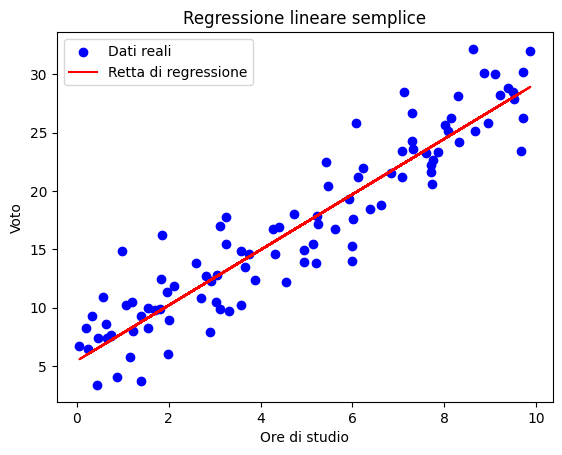

In [8]:
ind_var = df['OreStudio'].values
ind_var = ind_var.reshape(-1,1)
dip_var = df['VotoEsame'].values

x_train, x_test, y_train, y_test = train_test_split(ind_var, dip_var, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_predetta = model.predict(x_test)

print("Coefficiente angolare:", model.coef_[0])
print("Intercetta:", model.intercept_)
print("R²:", r2_score(y_test, y_predetta))
print("Errore quadratico medio:", mean_squared_error(y_test, y_predetta))

plt.scatter(ind_var, dip_var, color='blue', label='Dati reali')
plt.plot(ind_var, model.predict(ind_var), color='red', label='Retta di regressione')
plt.xlabel("Ore di studio")
plt.ylabel("Voto")
plt.legend()
plt.title("Regressione lineare semplice")
plt.show()


In [9]:
voto_previsto = model.predict(ind_var)

print(f"Voto previsto per 5 ore di studio: {voto_previsto[0]:.2f}")

Voto previsto per 5 ore di studio: 14.35
